### Q1. What is the mathematical formula for a linear SVM?


The mathematical formula for a linear Support Vector Machine (SVM) is typically expressed in terms of finding a hyperplane that best separates two classes of data in a linearly separable dataset. The equation of the hyperplane can be written as:

f(x) = wx + b

Where:

f(x) is the decision function.
x is the input data.
w is the weight vector perpendicular to the hyperplane.
b is the bias term.

### Q2. What is the objective function of a linear SVM?

The goal of the linear SVM is to find the values of the weight vector w and bias term b that minimize the objective function while satisfying the constraints. In practical terms, optimization techniques, such as quadratic programming solvers, are used to find these values. The SVM seeks to find the optimal hyperplane that maximizes the margin while allowing for some flexibility in the form of the slack variables ξ_i, controlled by the regularization parameter C.

### Q3. What is the kernel trick in SVM?

By using a suitable kernel function, you can implicitly project the original data into a higher-dimensional space where it becomes linearly separable. The SVM then works in this higher-dimensional space to find a hyperplane that best separates the data. The remarkable aspect of the kernel trick is that it avoids the computational cost of explicitly transforming data into a higher dimension while still effectively capturing complex patterns in the data.

When selecting a kernel function for your SVM, it's essential to consider the nature of your data and the specific problem you are trying to solve. Different kernel functions may work better for different types of datasets, and tuning the kernel parameters (if applicable) is often necessary to achieve the best performance. The choice of kernel function is a crucial aspect of using SVMs effectively for non-linear classification tasks.






### Q4. What is the role of support vectors in SVM Explain with example

Support vectors play a crucial role in Support Vector Machines (SVMs) and are central to the SVM algorithm's operation. They are the data points from the training dataset that are closest to the decision boundary (hyperplane). These support vectors directly influence the placement and orientation of the hyperplane and are essential for making predictions and maximizing the margin in SVM. Let's explain the role of support vectors with an example:

Suppose you have a binary classification problem involving two classes, A and B, and your goal is to find a linear decision boundary (hyperplane) that best separates these two classes. Your dataset consists of points in two-dimensional space (x, y).

Here's a simplified example with some data points:

- Class A: {(2, 2), (3, 3), (2, 3)}
- Class B: {(7, 7), (8, 8), (7, 8)}

In this example, we have six data points, three from each class. The SVM algorithm will aim to find a hyperplane that best separates these classes. However, not all data points are equally important in determining the position of the hyperplane. Only a subset of data points, which are the support vectors, have a significant impact.

In this case, the support vectors would be:

- For Class A: (2, 2), (2, 3)
- For Class B: (7, 7), (7, 8)

These support vectors are the closest data points to the decision boundary, and they define the margin. The margin is the distance between the hyperplane and the closest support vectors. The goal of the SVM is to maximize this margin while ensuring that all support vectors are correctly classified.

The support vectors are crucial because:

1. They are the points that are most difficult to classify correctly or that are closest to the decision boundary. Changing their positions can have a significant impact on the hyperplane.

2. They define the margin, and maximizing the margin helps improve the model's generalization to new, unseen data.

3. The SVM decision function depends only on the support vectors, making the SVM algorithm efficient in terms of memory and computation. Other data points that are not support vectors do not affect the decision boundary.

In summary, support vectors are the key data points that drive the SVM's learning process. They define the margin, influence the position of the hyperplane, and determine the decision function's behavior. SVMs aim to find the optimal hyperplane that correctly classifies all support vectors while maximizing the margin, which leads to a robust and generalizable model.

### Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

I'll provide a textual description of the concepts of Hyperplane, Marginal plane, Soft margin, and Hard margin in SVM along with some simplified explanations. Unfortunately, I can't create visual graphs directly in this text-based format, but I'll describe them clearly.

**1. Hyperplane:**
   - The hyperplane is the decision boundary that separates data points of different classes in an SVM.
   - In a simple 2D case with two classes (A and B), the hyperplane is a straight line.
   - Example: Imagine two classes of data points in a 2D plane. The hyperplane would be the line that best separates these two classes, like a boundary line between two groups of points.

**2. Marginal Plane:**
   - The marginal plane (margin) is the region around the hyperplane.
   - It is defined by two parallel planes located on either side of the hyperplane.
   - The distance between these parallel planes is the margin width.
   - Example: If you imagine the hyperplane as a boundary line between two classes, the marginal planes would be two parallel lines running on either side of the boundary, defining a region between them.

**3. Hard Margin:**
   - In a hard margin SVM, the goal is to find a hyperplane with the maximum margin width that perfectly separates the two classes.
   - It assumes that the data is linearly separable, and no data points are allowed to exist within the margin or on the wrong side of the hyperplane.
   - Example: If your data is such that it can be perfectly separated by a straight line, a hard margin SVM will find the line that has the maximum possible distance from the nearest data point on either side.

**4. Soft Margin:**
   - In a soft margin SVM, some data points are allowed to exist within the margin or on the wrong side of the hyperplane.
   - This is used when the data is not perfectly linearly separable or when you want to allow for some misclassification.
   - A regularization parameter (C) is introduced to control the trade-off between maximizing the margin width and allowing some misclassification.
   - Example: If your data has some noise or outliers that make perfect separation impossible, a soft margin SVM will find the hyperplane that maximizes the margin while allowing some data points to be within the margin or even on the wrong side. The parameter C determines how much tolerance you have for such misclassification.

Visualizing these concepts is easier with graphical representations, but I hope these textual descriptions help you understand the fundamental ideas behind hyperplanes, marginal planes, and the difference between hard and soft margin SVMs.

In [2]:
import numpy as np

# Generate random data points for two classes
np.random.seed(0)
class_A = np.random.randn(20, 2) + [2, 2]
class_B = np.random.randn(20, 2) + [7, 7]

# Combine the data points and labels
X = np.vstack((class_A, class_B))
y = np.hstack((np.ones(20), -np.ones(20)))  # Class labels: +1 and -1


In [3]:
from sklearn import svm

# Hard Margin SVM
hard_margin_model = svm.SVC(kernel='linear', C=np.inf)
hard_margin_model.fit(X, y)

# Soft Margin SVM
soft_margin_model = svm.SVC(kernel='linear', C=1.0)
soft_margin_model.fit(X, y)


SVC(kernel='linear')

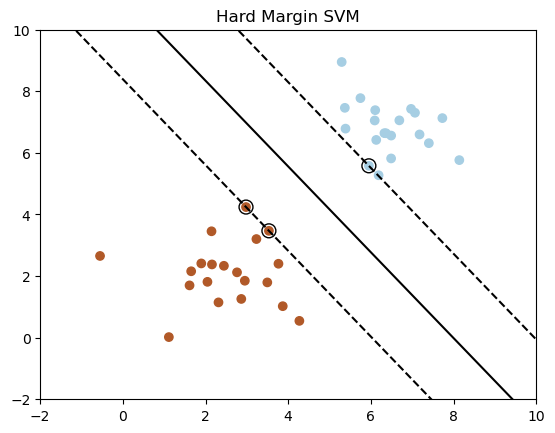

In [4]:
import matplotlib.pyplot as plt

# Create a scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Get the hyperplane and support vectors
w = hard_margin_model.coef_[0]
b = hard_margin_model.intercept_[0]
margin = 1 / np.linalg.norm(w)

# Plot the hyperplane (a line in this 2D example)
xx = np.linspace(-2, 10)
yy = -w[0] / w[1] * xx - b / w[1]
plt.plot(xx, yy, 'k-')

# Plot the margins
yy = -w[0] / w[1] * xx - (b - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = -w[0] / w[1] * xx - (b + 1) / w[1]
plt.plot(xx, yy, 'k--')

# Highlight the support vectors
plt.scatter(hard_margin_model.support_vectors_[:, 0], hard_margin_model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k')

# Set axis limits and show the plot
plt.xlim(-2, 10)
plt.ylim(-2, 10)
plt.title("Hard Margin SVM")
plt.show()


### Q6. SVM Implementation through Iris dataset.

Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.
~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
~ Train a linear SVM classifier on the training set and predict the labels for the testing setl
~ Compute the accuracy of the model on the testing setl
~ Plot the decision boundaries of the trained model using two of the featuresl
~ Try different values of the regularisation parameter C and see how it affects the performance of
the model.

### ANSWER

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import load_iris

In [7]:
dataset = load_iris()

In [10]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
df = pd.DataFrame(dataset.data,columns = dataset.feature_names)

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
X = df
y = dataset.target

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [19]:
from sklearn.svm import SVC

In [20]:
svc = SVC(kernel="linear")

In [21]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [22]:
## prediction

In [23]:
y_pred = svc.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [25]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

[[11  0  0]
 [ 0 15  0]
 [ 0  0 12]]
1.0


In [26]:
### Hyperparameter tuning with svc

In [27]:
parameters = {"C":[0.1,1,10,100,100]}

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
grid = GridSearchCV(SVC(),param_grid=parameters,refit=True,cv=5,verbose=3)

In [30]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .............................C=0.1;, score=0.739 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.870 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.909 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=0.909 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.864 total time=   0.0s
[CV 1/5] END ...............................C=1;, score=0.913 total time=   0.0s
[CV 2/5] END ...............................C=1;, score=0.957 total time=   0.0s
[CV 3/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 4/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 5/5] END ...............................C=1;, score=0.955 total time=   0.0s
[CV 1/5] END ..............................C=10;, score=0.957 total time=   0.0s
[CV 2/5] END ..............................C=10;,

GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 100]},
             verbose=3)

In [32]:
grid.best_params_

{'C': 10}

In [33]:
y_pred1 = grid.predict(X_test)

In [34]:
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

[[11  0  0]
 [ 0 15  0]
 [ 0  0 12]]
1.0
